# Imports

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import subprocess

In [6]:
from src.variables import energyplus_install_dir
from src.parsing import parse_energyplus_datetime_string, print_subprocess_results

# EnergyPlus Simulation

In [7]:
idf_file_relative = Path("./test/CEA_idf.idf")
weather_file_path = Path("C:\EnergyPlusV22-1-0\WeatherData\epw.CWEC_2020_QC\CAN_QC_MONTREAL-INTL-A_7025251_CWEC.epw")
output_relative_directory='./sim'

In [8]:
import os, shutil

folder = output_relative_directory='./sim'
for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

In [9]:
result = subprocess.run([f"energyplus", "--readvars",
                         "--output-directory", f"{output_relative_directory}",
                         "--weather", f"{weather_file_path}",
                         f"{idf_file_relative}"
                        ],
                        capture_output=True
                       )

In [10]:
print_subprocess_results(result)

---ARGS---
 ['energyplus', '--readvars', '--output-directory', './sim', '--weather', 'C:\\EnergyPlusV22-1-0\\WeatherData\\epw.CWEC_2020_QC\\CAN_QC_MONTREAL-INTL-A_7025251_CWEC.epw', 'test\\CEA_idf.idf']
---RETURNCODE---
 0 (SUCCESS)
---STDOUT---
 EnergyPlus Starting
EnergyPlus, Version 22.1.0-ed759b17ee, YMD=2023.01.24 17:55
Adjusting Air System Sizing
Adjusting Standard 62.1 Ventilation Sizing
Initializing Simulation
Reporting Surfaces
Beginning Primary Simulation
Initializing New Environment Parameters
Warming up {1}
Warming up {2}
Warming up {3}
Warming up {4}
Warming up {5}
Warming up {6}
Warming up {7}
Warming up {8}
Warming up {9}
Warming up {10}
Warming up {11}
Warming up {12}
Warming up {13}
Warming up {14}
Warming up {15}
Warming up {16}
Warming up {17}
Warming up {18}
Warming up {19}
Warming up {20}
Warming up {21}
Warming up {22}
Warming up {23}
Warming up {24}
Warming up {25}
Warming up {26}
Warming up {27}
Warming up {28}
Warming up {29}
Warming up {30}
Warming up {31}
War

# Results

In [11]:
df=pd.read_csv("./sim/eplusout.csv",
               parse_dates=[0],
               index_col=[0],
               date_parser=parse_energyplus_datetime_string
              )

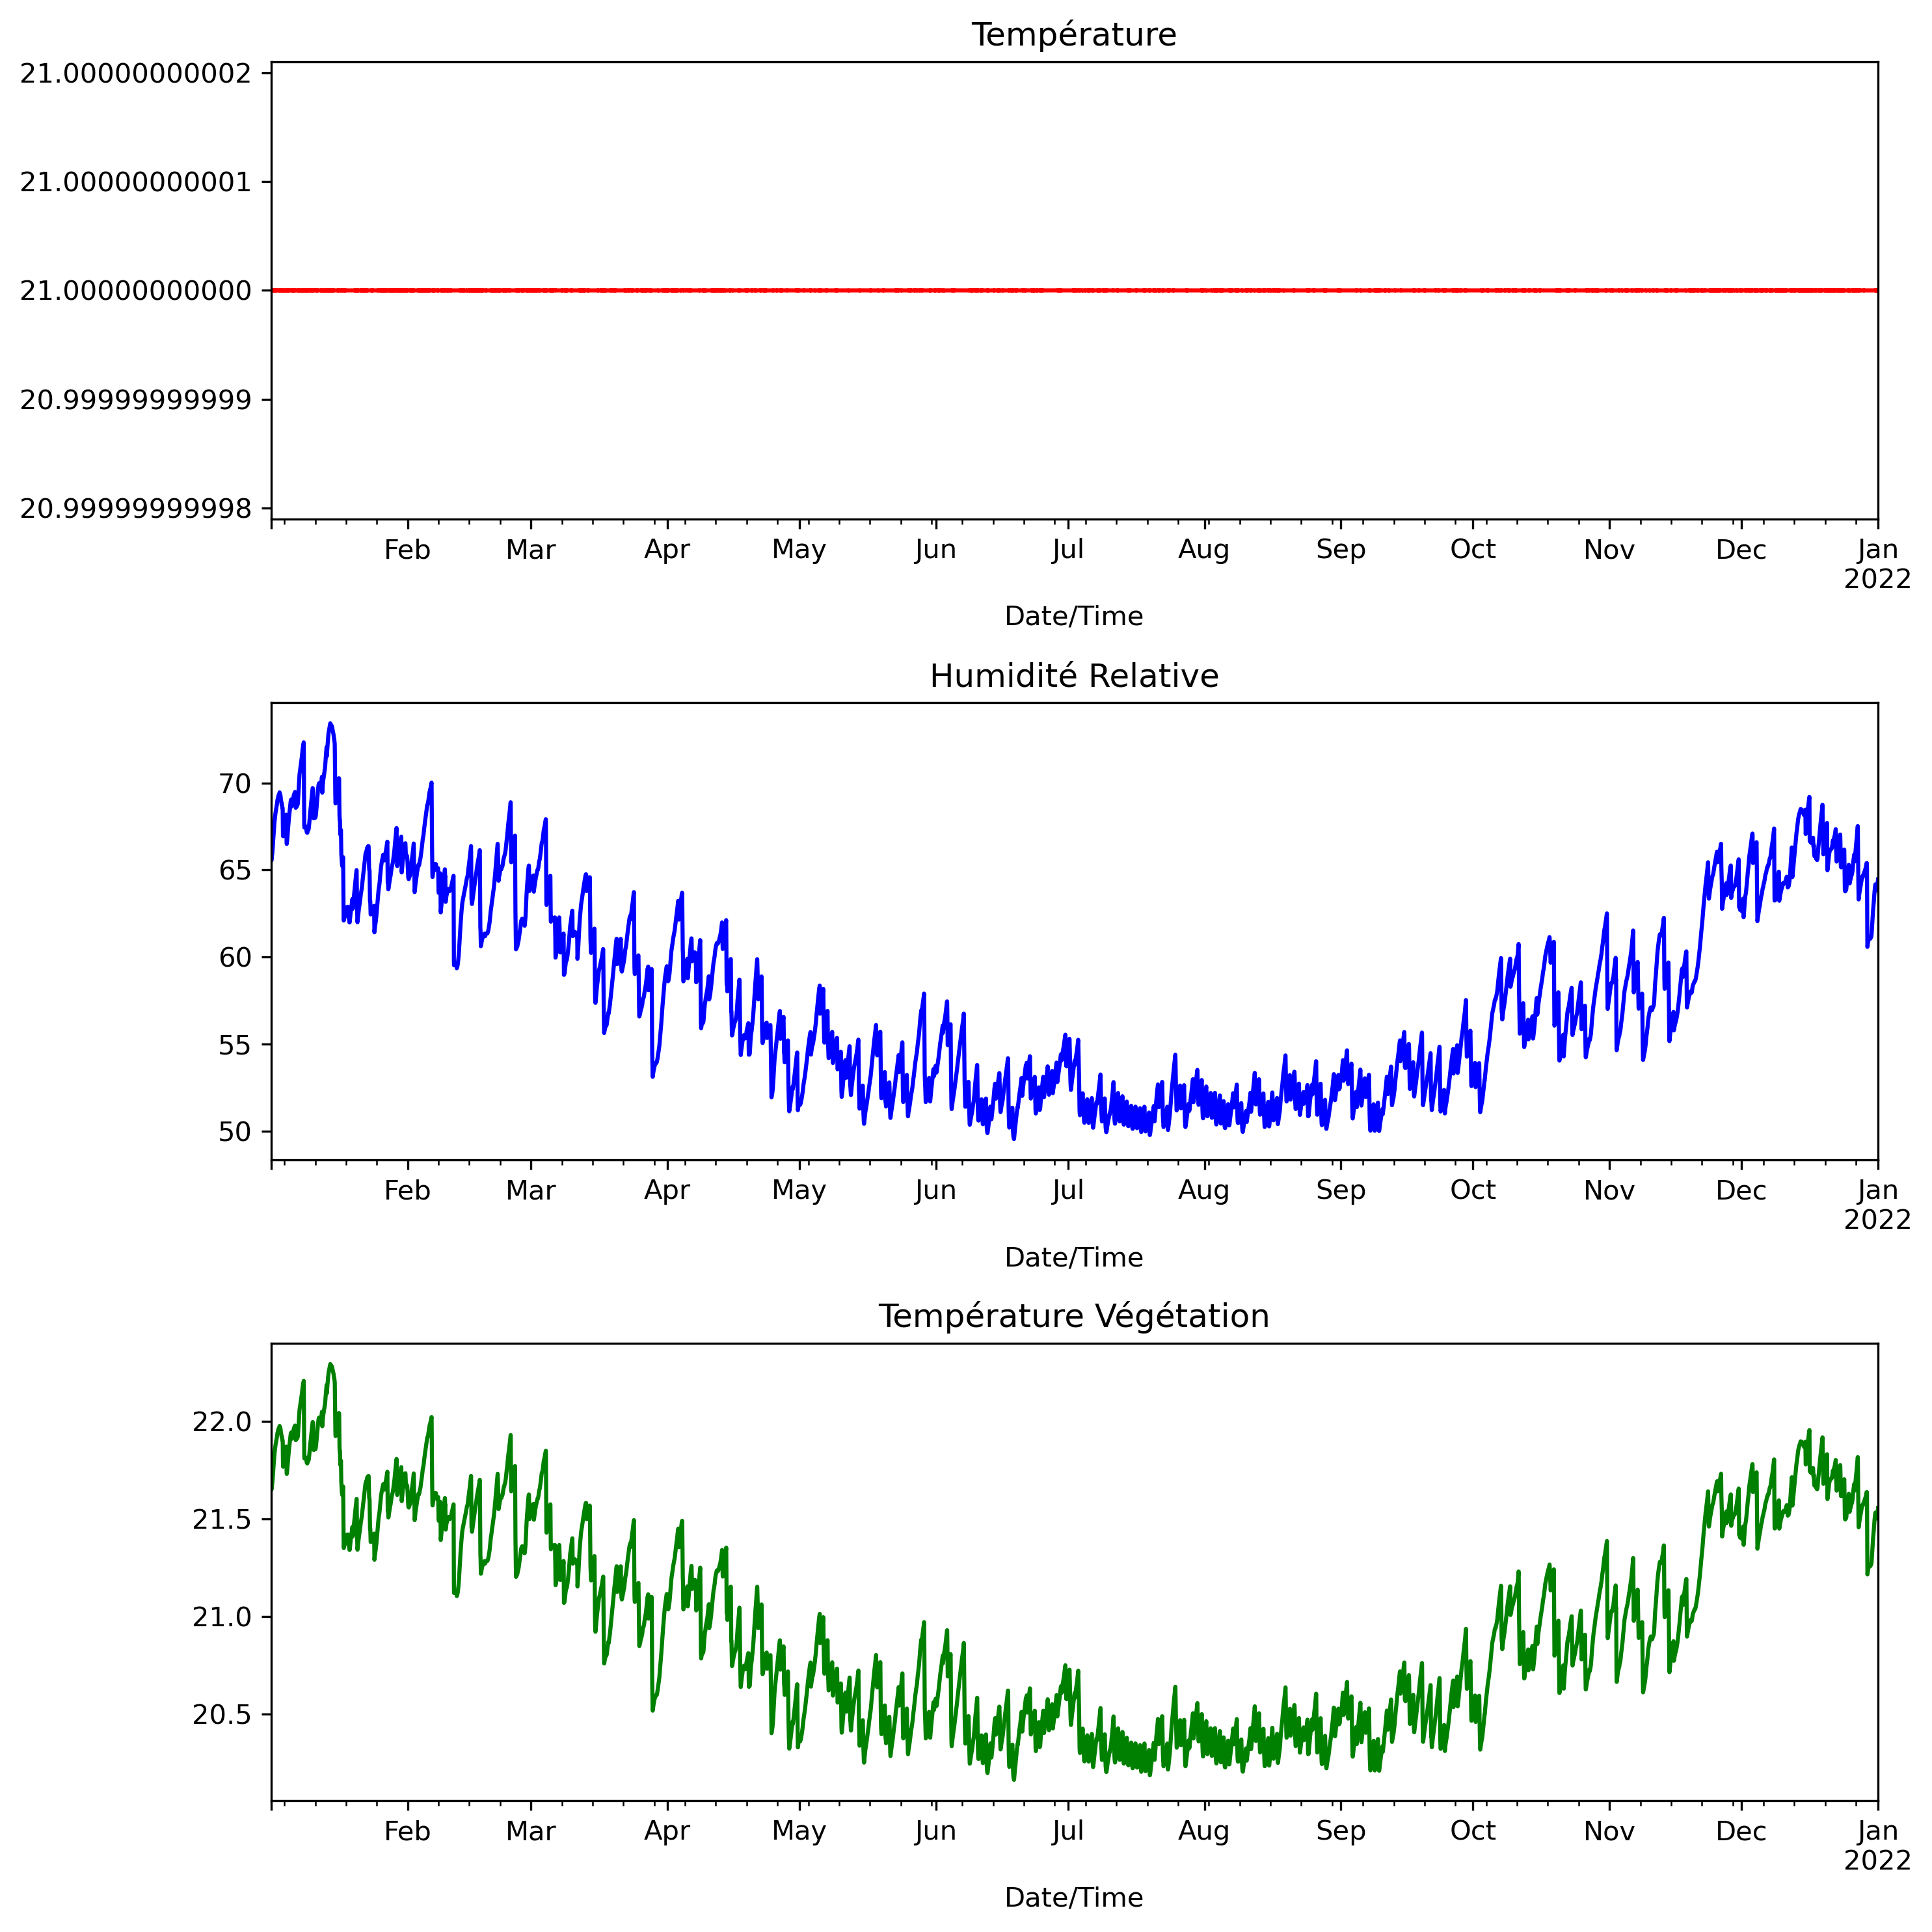

In [12]:
fig, ax = plt.subplots(3,1,figsize = (10,10),dpi=300)
ax[0].ticklabel_format(useOffset=False)
ax[0].set_title("Température")
ax[1].set_title("Humidité Relative")
ax[2].set_title("Température Végétation")
df.iloc[:,0].plot(ax=ax[0], color='red')
df.iloc[:,1].plot(ax=ax[1], color='blue')
df["Vegetation Temperature:PythonPlugin:OutputVariable [C](TimeStep)"].plot(ax=ax[2], color='green')
plt.tight_layout()
plt.show()

In [13]:
import numpy as np
trnsys_data = pd.read_csv(r"C:\Users\Gilbert\PycharmProjects\Doc_Art2\ref_qlat2.txt",sep='\t', skiprows=1, usecols=[1,2], skipfooter=23, engine="python", dtype=np.float64)

In [51]:
a = trnsys_data.iloc[:,0].apply(lambda x: x*-1000)
b = trnsys_data.iloc[:,1].apply(lambda x: x*1000)
c = pd.read_csv("t_veg.txt",names=["time","temp",1], sep="\t", index_col=0).drop(1,axis=1)
c = c.iloc[1:,:]
c.index = df.index

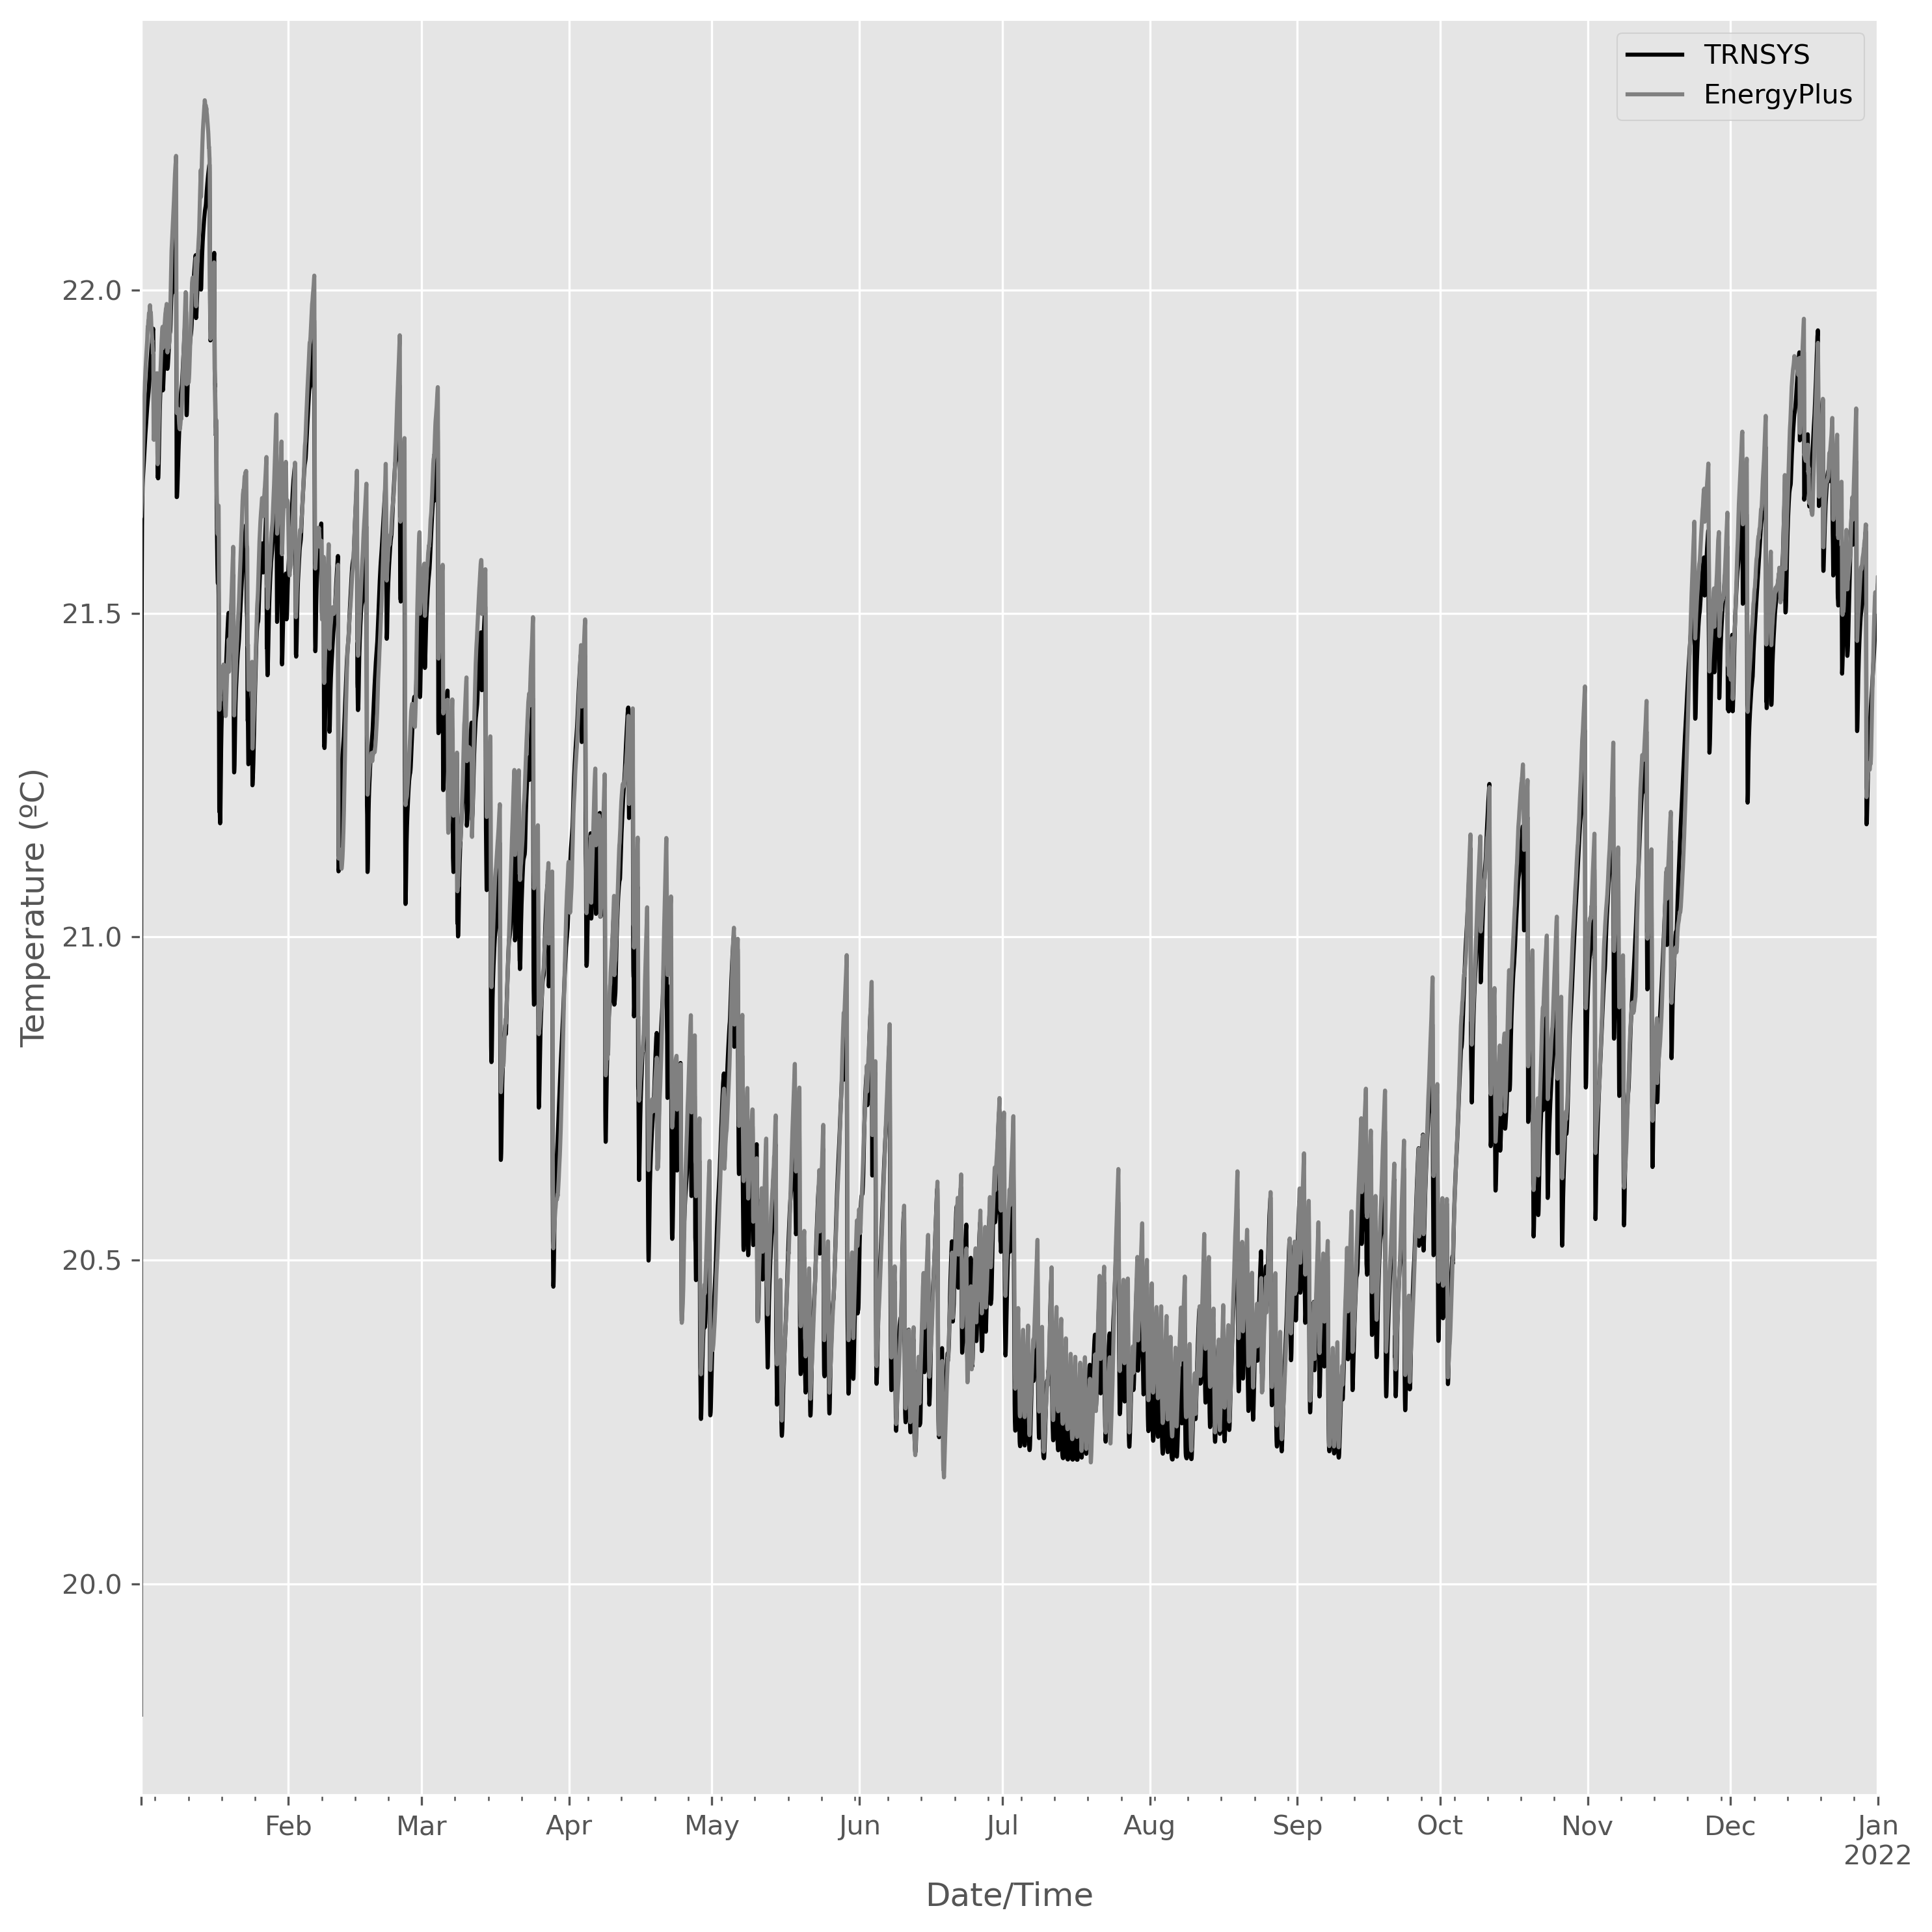

In [154]:
fig, ax = plt.subplots(1,1,figsize = (10,10),dpi=300)
ax.ticklabel_format(useOffset=False)
c.plot(ax=ax, color="k")
ax.set_ylabel("Temperature (ºC)")
df["Vegetation Temperature:PythonPlugin:OutputVariable [C](TimeStep)"].plot(ax=ax,color='grey')
plt.legend(["TRNSYS","EnergyPlus"])
plt.tight_layout()
plt.savefig("comp.png")

In [67]:
dd = df["Vegetation Temperature:PythonPlugin:OutputVariable [C](TimeStep)"].values - c.values.reshape(1,-1)

In [73]:
pd.DataFrame(dd.reshape(-1,1)).describe()

,0
count,52560.000000
mean,0.036388
std,0.051365
min,-0.157306
25%,0.005538
50%,0.036964
75%,0.066076
max,1.966183


<AxesSubplot: >

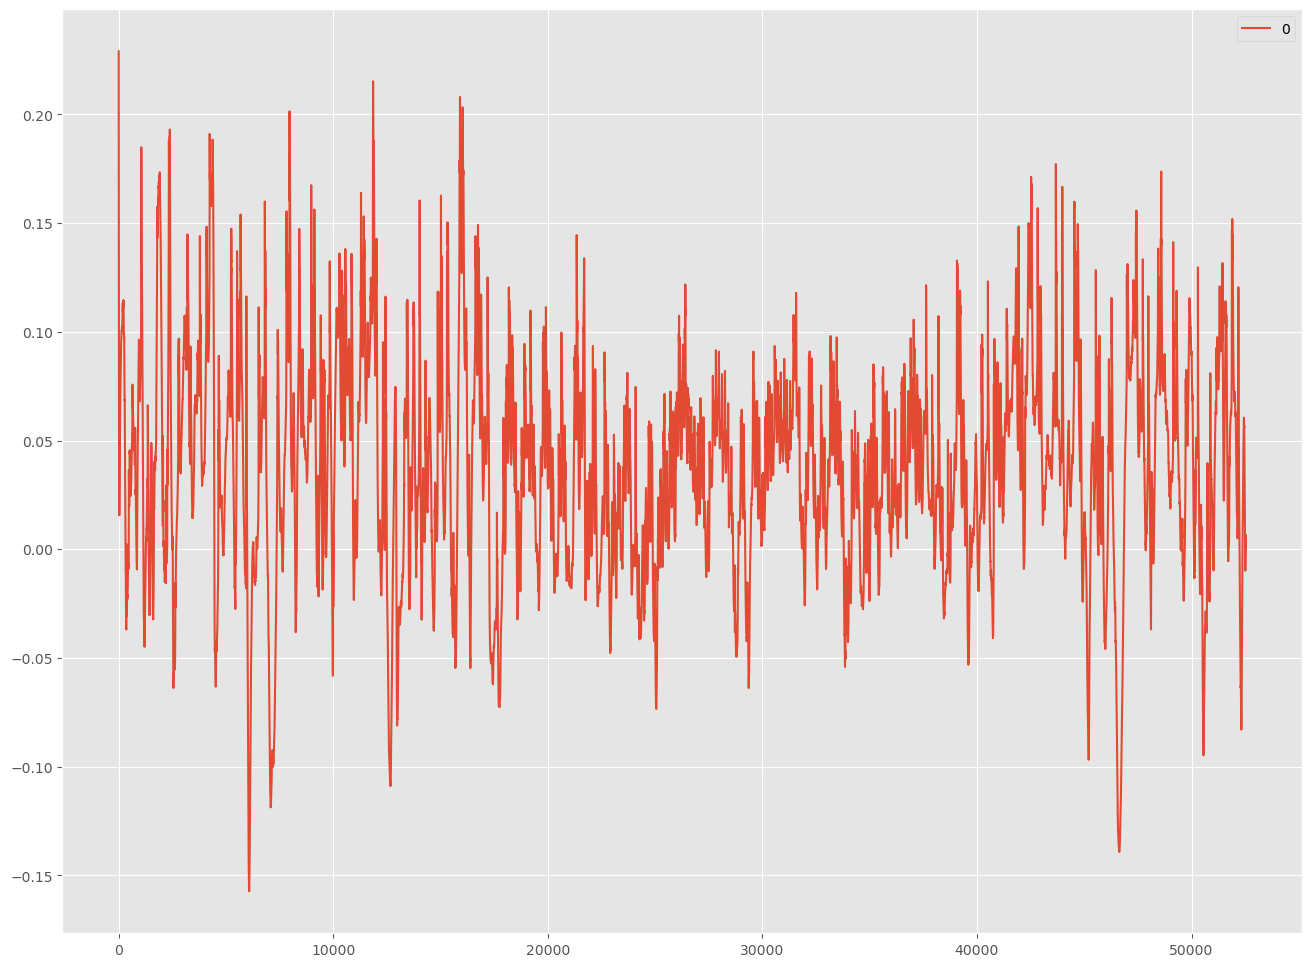

In [138]:
pd.DataFrame(dd.reshape(-1,1)[20:]).plot()

  1 / 105: ksone
  2 / 105: kstwo
  3 / 105: kstwobign
  4 / 105: norm
  5 / 105: alpha
  6 / 105: anglit
  7 / 105: arcsine
  8 / 105: beta
  9 / 105: betaprime
 10 / 105: bradford
 11 / 105: burr
 12 / 105: burr12
 13 / 105: fisk
 14 / 105: cauchy
 15 / 105: chi
 16 / 105: chi2
 17 / 105: cosine
 18 / 105: dgamma
 19 / 105: dweibull
 20 / 105: expon
 21 / 105: exponnorm
 22 / 105: exponweib
 23 / 105: exponpow
 24 / 105: fatiguelife
 25 / 105: foldcauchy
 26 / 105: f
 27 / 105: foldnorm
 28 / 105: weibull_min
 29 / 105: truncweibull_min
 30 / 105: weibull_max
 31 / 105: genlogistic
 32 / 105: genpareto
 33 / 105: genexpon
 34 / 105: genextreme
 35 / 105: gamma
 36 / 105: erlang
 37 / 105: gengamma
 38 / 105: genhalflogistic
 39 / 105: genhyperbolic
 40 / 105: gompertz
 41 / 105: gumbel_r
 42 / 105: gumbel_l
 43 / 105: halfcauchy
 44 / 105: halflogistic
 45 / 105: halfnorm
 46 / 105: hypsecant
 47 / 105: gausshyper
 48 / 105: invgamma
 49 / 105: invgauss
 50 / 105: geninvgauss
 51 / 1

Text(0, 0.5, 'Frequency')

<Figure size 1200x800 with 0 Axes>

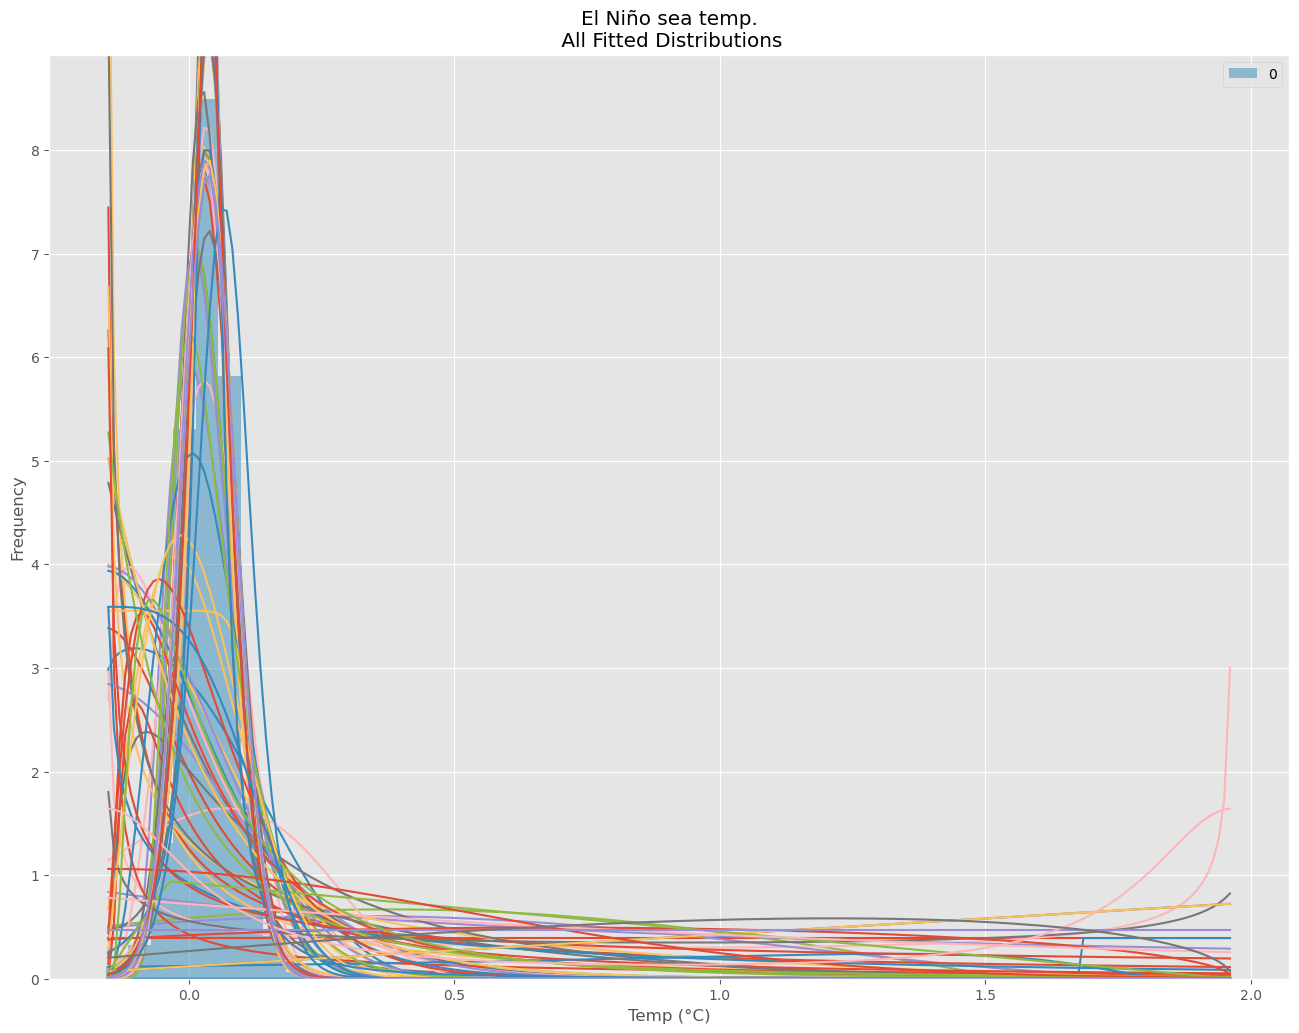

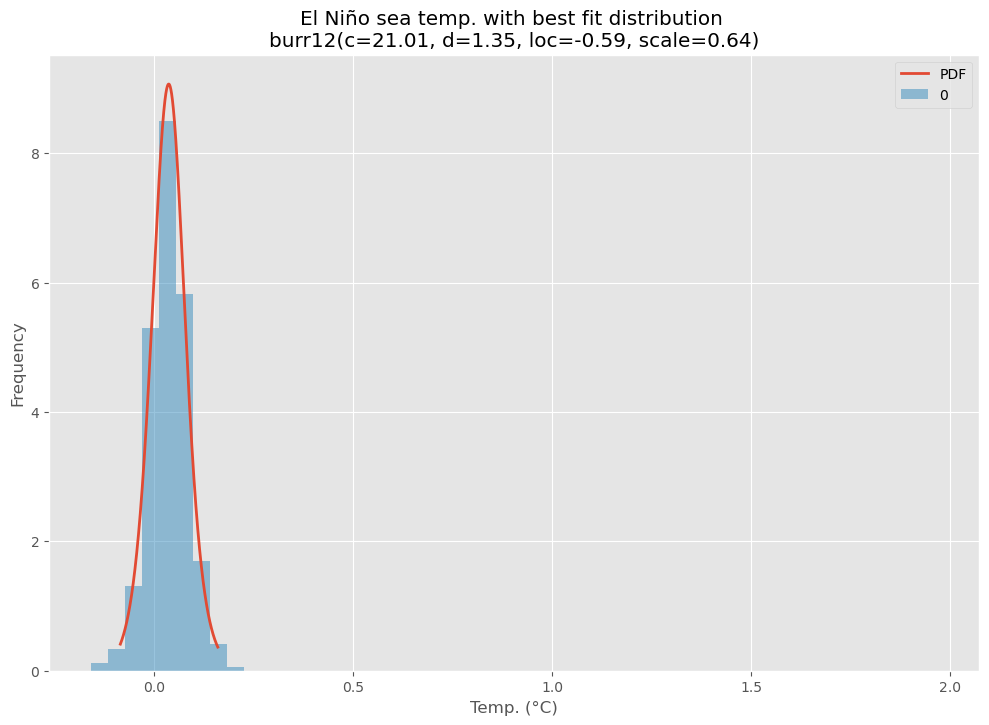

In [129]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))

        except Exception:
            pass


    return sorted(best_distributions, key=lambda x:x[2])

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = pd.DataFrame(dd.reshape(-1,1))

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_distibutions = best_fit_distribution(data, 200, ax)
best_dist = best_distibutions[0]

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF with best params
pdf = make_pdf(best_dist[0], best_dist[1])

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)

ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')

In [145]:
stats.ttest_1samp()

AndersonResult(statistic=13477.350179734247, critical_values=array([0.474, 0.636, 0.756, 0.876, 1.037]), significance_level=array([25. , 10. ,  5. ,  2.5,  1. ]))